In [1]:
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/djosue27/OneDrive/Big Data XTOL/Module 5/Task 4/Consolidated.csv", header=0)

In [3]:
data.head()

,resultId,raceId,year,name,date,time_of_day,country,month,driverId,drivername,...,constructor,constructor_country,number,grid,points,laps,milliseconds,statusId,status,position
0,18113,748,1960,Indianapolis 500,5/30/1960,19:00:00,USA,5,509,Jim Rathmann,...,Watson,American,4,2,8.0,200,12971360,1,Finished,1.0
1,18114,748,1960,Indianapolis 500,5/30/1960,19:00:00,USA,5,449,Rodger Ward,...,Watson,American,1,3,6.0,200,12984110,1,Finished,2.0
2,18115,748,1960,Indianapolis 500,5/30/1960,19:00:00,USA,5,510,Paul Goldsmith,...,Epperly,American,99,26,4.0,200,13158660,1,Finished,3.0
3,18116,748,1960,Indianapolis 500,5/30/1960,19:00:00,USA,5,511,Don Branson,...,Phillips,American,7,8,3.0,200,13159340,1,Finished,4.0
4,18117,748,1960,Indianapolis 500,5/30/1960,19:00:00,USA,5,512,Johnny Thomson,...,Lesovsky,American,3,17,2.0,200,13162710,1,Finished,5.0


In [4]:
data.describe()

,resultId,raceId,year,month,driverId,age_at_race,constructorId,number,grid,points,laps,milliseconds,statusId,position
count,10803.000000,10803.000000,10803.000000,10803.000000,10803.000000,10803.000000,10803.000000,10803.000000,10803.000000,10803.000000,10803.000000,1.080300e+04,10803.000000,9253.000000
mean,12254.031102,489.562436,2001.154772,6.834583,231.469777,28.654263,35.288068,15.233731,9.987966,3.653350,59.297695,5.883649e+06,6.628992,7.276667
std,9066.819051,362.640942,15.643706,2.422114,312.589150,5.046513,59.391392,15.045831,6.358543,5.201801,21.038878,1.957557e+06,11.924619,5.115524
min,1.000000,1.000000,1950.000000,1.000000,1.000000,17.000000,1.000000,0.000000,0.000000,0.000000,15.000000,5.126240e+05,1.000000,1.000000
25%,3048.500000,146.000000,1997.000000,5.000000,18.000000,25.000000,4.000000,6.000000,4.000000,0.000000,52.000000,5.203256e+06,1.000000,3.000000
50%,12051.000000,392.000000,2005.000000,7.000000,56.000000,28.000000,9.000000,12.000000,9.000000,1.000000,57.000000,5.642928e+06,1.000000,6.000000
75%,21703.500000,879.000000,2012.000000,9.000000,327.000000,32.000000,22.000000,20.000000,15.000000,6.000000,69.000000,6.185623e+06,11.000000,11.000000
max,24625.000000,1030.000000,2019.000000,12.000000,848.000000,51.000000,211.000000,117.000000,33.000000,50.000000,200.000000,1.542307e+07,137.000000,24.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10803 entries, 0 to 10802
Data columns (total 19 columns):
year                   10803 non-null int64
name                   10803 non-null object
date                   10803 non-null datetime64[ns]
time_of_day            10803 non-null object
country                10803 non-null object
month                  10803 non-null int64
drivername             10803 non-null object
driver_country         10803 non-null object
birth_date             10803 non-null datetime64[ns]
age_at_race            10803 non-null int64
constructor            10803 non-null object
constructor_country    10803 non-null object
number                 10803 non-null int64
grid                   10803 non-null int64
points                 10803 non-null float64
laps                   10803 non-null int64
milliseconds           10803 non-null int64
status                 10803 non-null object
position               9253 non-null object
dtypes: datetime64[ns](2), 

In [6]:
del data['resultId']

In [15]:
del data['raceId']

In [16]:
del data['driverId']

In [17]:
del data['constructorId']

In [18]:
del data['statusId']

In [19]:
data['position'] = data['position'].astype(object)

In [20]:
header = data.dtypes.index

In [21]:
data['birth_date'] = pd.to_datetime(data['birth_date'])

In [22]:
data['date'] = pd.to_datetime(data['date'])

In [23]:
print(header)

Index(['year', 'name', 'date', 'time_of_day', 'country', 'month', 'drivername',
       'driver_country', 'birth_date', 'age_at_race', 'constructor',
       'constructor_country', 'number', 'grid', 'points', 'laps',
       'milliseconds', 'status', 'position'],
      dtype='object')


(array([2863., 1412., 1070., 1370.,  799.,  676.,  737.,  221.,   84.,
          21.]),
 array([1.0, 3.3, 5.6, 7.8999999999999995, 10.2, 12.5, 14.799999999999999,
        17.099999999999998, 19.4, 21.7, 24.0], dtype=object),
 <a list of 10 Patch objects>)

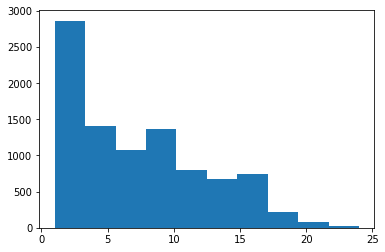

In [24]:
plt.hist(data['position'])

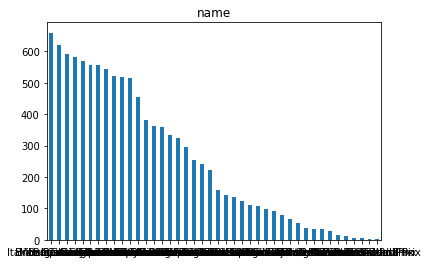

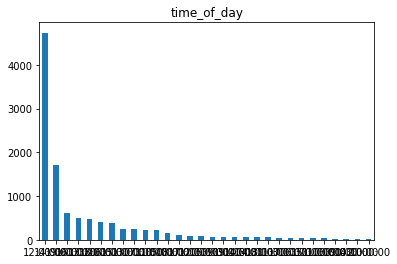

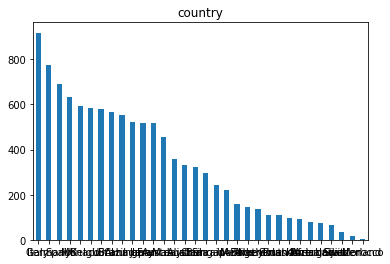

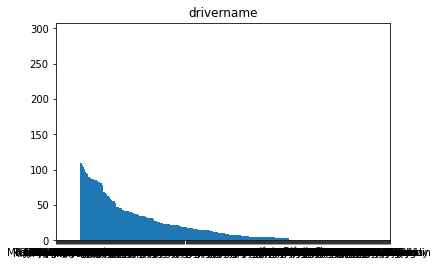

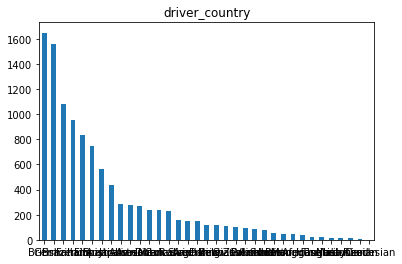

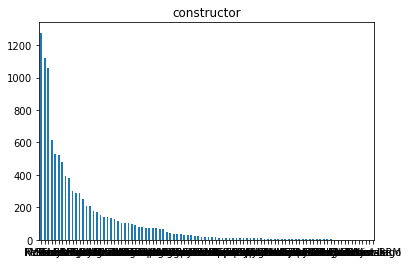

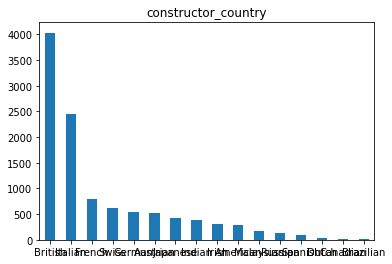

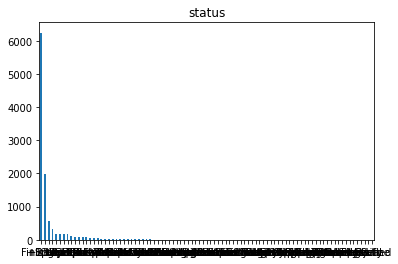

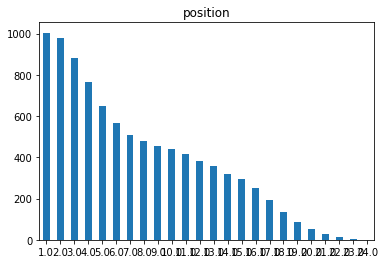

In [30]:
for col in data.columns:
    if data[col].dtype == "object":
        # If categorical, do a count bar plot
        lm = pd.value_counts(data[col]).plot.bar()
        lm.set_xticklabels(lm.get_xticklabels(),rotation=0)
        plt.title(col)
        plt.show()


In [31]:
data.head()

,year,name,date,time_of_day,country,month,drivername,driver_country,birth_date,age_at_race,constructor,constructor_country,number,grid,points,laps,milliseconds,status,position
0,1960,Indianapolis 500,1960-05-30,19:00:00,USA,5,Jim Rathmann,American,1928-07-16,31,Watson,American,4,2,8.0,200,12971360,Finished,1
1,1960,Indianapolis 500,1960-05-30,19:00:00,USA,5,Rodger Ward,American,1921-01-10,39,Watson,American,1,3,6.0,200,12984110,Finished,2
2,1960,Indianapolis 500,1960-05-30,19:00:00,USA,5,Paul Goldsmith,American,1925-10-02,34,Epperly,American,99,26,4.0,200,13158660,Finished,3
3,1960,Indianapolis 500,1960-05-30,19:00:00,USA,5,Don Branson,American,1920-06-02,39,Phillips,American,7,8,3.0,200,13159340,Finished,4
4,1960,Indianapolis 500,1960-05-30,19:00:00,USA,5,Johnny Thomson,American,1922-04-09,38,Lesovsky,American,3,17,2.0,200,13162710,Finished,5


In [33]:
corrMat = data.corr()

In [34]:
print(corrMat)

                  year     month  age_at_race    number      grid    points  \
year          1.000000  0.095541    -0.313742  0.137521  0.235917  0.006391   
month         0.095541  1.000000    -0.000589  0.029454  0.006867  0.036959   
age_at_race  -0.313742 -0.000589     1.000000 -0.143223 -0.195554  0.111556   
number        0.137521  0.029454    -0.143223  1.000000  0.227846 -0.049573   
grid          0.235917  0.006867    -0.195554  0.227846  1.000000 -0.552910   
points        0.006391  0.036959     0.111556 -0.049573 -0.552910  1.000000   
laps         -0.346719 -0.086156     0.130489  0.057330 -0.071868  0.122850   
milliseconds -0.343108 -0.044551     0.166582  0.052360 -0.114773  0.188709   

                  laps  milliseconds  
year         -0.346719     -0.343108  
month        -0.086156     -0.044551  
age_at_race   0.130489      0.166582  
number        0.057330      0.052360  
grid         -0.071868     -0.114773  
points        0.122850      0.188709  
laps          1

In [35]:
covMat = data.cov()

In [36]:
print(covMat)

                      year          month   age_at_race        number  \
year          2.447255e+02       3.620124 -2.476874e+01  3.236856e+01   
month         3.620124e+00       5.866636 -7.205383e-03  1.073383e+00   
age_at_race  -2.476874e+01      -0.007205  2.546729e+01 -1.087475e+01   
number        3.236856e+01       1.073383 -1.087475e+01  2.263770e+02   
grid          2.346696e+01       0.105767 -6.275037e+00  2.179794e+01   
points        5.200906e-01       0.465658  2.928443e+00 -3.879888e+00   
laps         -1.141141e+02      -4.390392  1.385437e+01  1.814769e+01   
milliseconds -1.050714e+07 -211235.536302  1.645639e+06  1.542163e+06   

                      grid        points          laps  milliseconds  
year          2.346696e+01  5.200906e-01 -1.141141e+02 -1.050714e+07  
month         1.057671e-01  4.656579e-01 -4.390392e+00 -2.112355e+05  
age_at_race  -6.275037e+00  2.928443e+00  1.385437e+01  1.645639e+06  
number        2.179794e+01 -3.879888e+00  1.814769e+01  1.

In [37]:
import seaborn as sns

In [38]:
import numpy as np

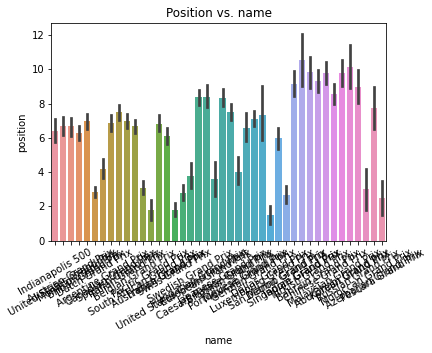

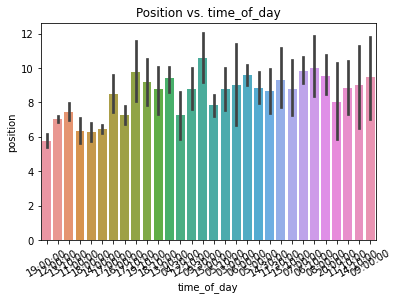

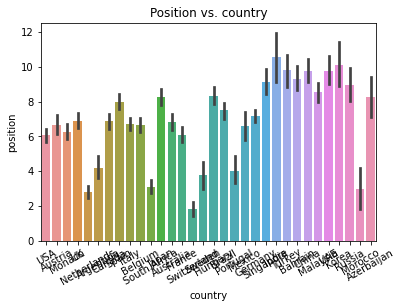

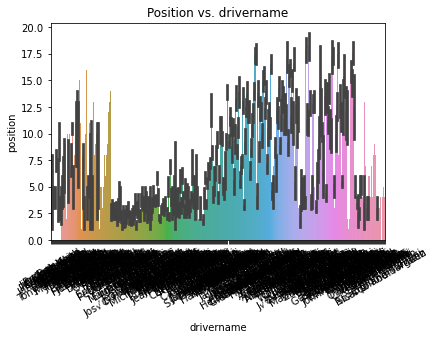

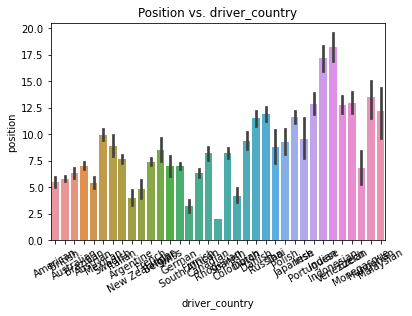

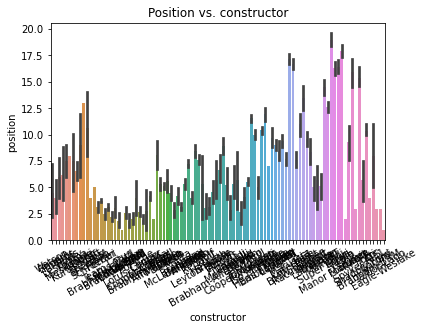

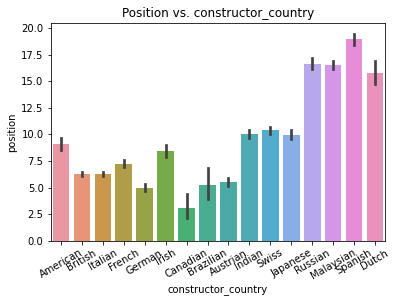

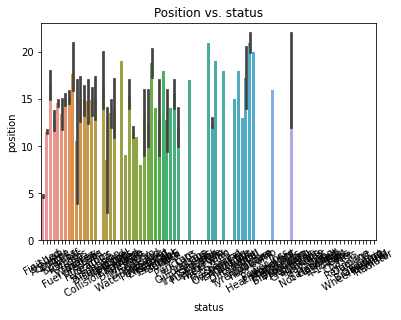

In [41]:
for col in data.columns:
    if col == "position":
        continue
    
    if data[col].dtype == "object":
        # If categorical, do a bar plot of counts
        lm = sns.barplot(data=data, x=col, y="position")
        lm.set_xticklabels(lm.get_xticklabels(),rotation=30)
        plt.title("Position vs. {}".format(col))
        plt.show()

